In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from config import geoapify_key
import json
import requests
from pprint import pprint
import hvplot.pandas

In [33]:
county_data=pd.read_csv("./Resources/pop_density_censusNY_project.csv")

county_datax=county_data.loc[county_data["Geography"]!="ALL"]
county_datax


,FIPS Code,Geography,Year,Program Type,Population,County,Land Area (sq mi.),Population Density (person/sq.mi.),Pop Density Growth Percentage
0,36001,Albany County,1980,Census Base Population,285909,Albany,522.80,546.880260,-0.290505
1,36001,Albany County,1990,Census Base Population,292812,Albany,522.80,560.084162,2.414405
2,36001,Albany County,2000,Census Base Population,294601,Albany,522.80,563.506121,0.610972
3,36001,Albany County,2010,Census Base Population,304199,Albany,522.80,581.864958,3.257966
4,36001,Albany County,2020,Census Base Population,314848,Albany,522.80,602.234124,3.500669
...,...,...,...,...,...,...,...,...,...
310,36123,Yates County,1980,Census Base Population,21459,Yates,338.14,63.461880,8.209369
311,36123,Yates County,1990,Census Base Population,22810,Yates,338.14,67.457266,6.295727
312,36123,Yates County,2000,Census Base Population,24591,Yates,338.14,72.724315,7.807979
313,36123,Yates County,2010,Census Base Population,25364,Yates,338.14,75.010351,3.143426


In [34]:
county_data1=county_datax.groupby(["Geography","Year"]).mean()
county_data2=county_data1.reset_index()
land_location=pd.DataFrame({"Geography":county_data2["Geography"],"Year":county_data2["Year"],\
                            "Land Area (sq mi.)":county_data2["Land Area (sq mi.)"],"Population":county_data2["Population"],\
                            "Population Density (person/sq.mi.)":county_data2["Population Density (person/sq.mi.)"],\
                           "Pop Density Growth Percentage":county_data2["Pop Density Growth Percentage"]})

land_location

,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.),Pop Density Growth Percentage
0,Albany County,1980,522.80,285909,546.880260,-0.290505
1,Albany County,1990,522.80,292812,560.084162,2.414405
2,Albany County,2000,522.80,294601,563.506121,0.610972
3,Albany County,2010,522.80,304199,581.864958,3.257966
4,Albany County,2020,522.80,314848,602.234124,3.500669
...,...,...,...,...,...,...
310,Yates County,1980,338.14,21459,63.461880,8.209369
311,Yates County,1990,338.14,22810,67.457266,6.295727
312,Yates County,2000,338.14,24591,72.724315,7.807979
313,Yates County,2010,338.14,25364,75.010351,3.143426


In [37]:
url="https://api.geoapify.com/v1/geocode/search?"

counties=land_location["Geography"]
longitude=[]
latitude=[]

for county in counties:
    params = {  
        "text":county,
        "state":"New York",
        "apiKey": geoapify_key,
    
        }
    response=requests.get(url,params=params).json()
    longitude.append(response["features"][0]["properties"]["lon"])
    latitude.append(response["features"][0]["properties"]["lat"])

land_location["Longitude"]=longitude   


land_location["Latitude"]=latitude
land_location

,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.),Pop Density Growth Percentage,Longitude,Latitude
0,Albany County,1980,522.80,285909,546.880260,-0.290505,-74.006015,40.712728
1,Albany County,1990,522.80,292812,560.084162,2.414405,-74.006015,40.712728
2,Albany County,2000,522.80,294601,563.506121,0.610972,-74.006015,40.712728
3,Albany County,2010,522.80,304199,581.864958,3.257966,-74.006015,40.712728
4,Albany County,2020,522.80,314848,602.234124,3.500669,-74.006015,40.712728
...,...,...,...,...,...,...,...,...
310,Yates County,1980,338.14,21459,63.461880,8.209369,-74.006015,40.712728
311,Yates County,1990,338.14,22810,67.457266,6.295727,-74.006015,40.712728
312,Yates County,2000,338.14,24591,72.724315,7.807979,-74.006015,40.712728
313,Yates County,2010,338.14,25364,75.010351,3.143426,-74.006015,40.712728


In [28]:
# url="https://api.geoapify.com/v1/geocode/reverse?lat=42.598690&lon=-73.984400&type=postcode&apiKey=294e1a1945cd4c079d3a082659604324"
# resp=requests.get(url).json()
# pprint(resp)

In [29]:
land_location2=land_location.loc[land_location["Year"]==2020,:]
land_location2.reset_index()

,index,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.),Pop Density Growth Percentage,Longitude,Latitude
0,4,ALL,2020,94252.78,40402498,428.661075,4.247740,-74.871618,43.408777
1,9,Albany County,2020,522.80,314848,602.234124,3.500669,-74.006015,40.712728
2,14,Allegany County,2020,1029.31,46456,45.133147,-5.042618,-74.006015,40.712728
3,19,Bronx County,2020,42.10,1472654,34979.904990,6.388417,-74.006015,40.712728
4,24,Broome County,2020,705.77,198683,281.512391,-0.990183,-74.006015,40.712728
...,...,...,...,...,...,...,...,...,...
59,299,Washington County,2020,831.18,61302,73.752978,-3.085971,-74.006015,40.712728
60,304,Wayne County,2020,603.83,91283,151.173344,-2.632505,-74.006015,40.712728
61,309,Westchester County,2020,430.50,1004457,2333.233449,5.801811,-74.006015,40.712728
62,314,Wyoming County,2020,592.75,40531,68.377900,-3.850168,-74.006015,40.712728


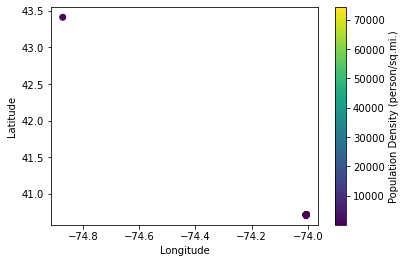

In [30]:

plt.scatter(land_location2['Longitude'],land_location2['Latitude'],c=land_location2['Population Density (person/sq.mi.)'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Population Density (person/sq.mi.)")
plt.show()

In [ ]:
# land_location3=land_location.loc[land_location["Year"]==2010,:]
# land_location3.reset_index()
# prev_yr_pop=land_location3["Population"]
# current_yr_pop=land_location2["Population"]
# pop_growth_percentage=[]

# for pop in prev_yr_pop:
#     for pops in current_yr_pop:
#         population_growth_rate=((current_yr_pop-prev_yr_pop)/prev_yr_pop)*100
#         pop_growth_percentage.append(population_growth_rate)
# print(pop_growth_percentage)

In [ ]:

land_location2


In [ ]:
map_plot=land_location2.hvplot.points("Longitude","Latitude",geo=True,tiles="OSM",frame_width=700,frame_height=500, 
                                    size="Population Density (person/sq.mi.)",color="Geography")

map_plot